In [1]:
import requests
from bs4 import BeautifulSoup


url = 'https://www.worldometers.info/coronavirus/country/germany/'
response = requests.get(url)
html_doc = response.text
soup = BeautifulSoup(html_doc, 'lxml') #parse
#print(soup.prettify())

#### Get some information

In [2]:
print(soup.title) # 把 tag 抓出來
print("---")
print(soup.title.name) # 把 title 的 tag 名稱抓出來
print("---")
print(soup.title.string) # 把 title tag 的內容印出來
print("---")
print(soup.title.parent.name) # title tag 的上一層 tag
print("---")
print(soup.a) # 把第一個 <a></a> 抓出來
print("---")

<title>Germany Coronavirus: 150,648 Cases and 5,315 Deaths - Worldometer</title>
---
title
---
Germany Coronavirus: 150,648 Cases and 5,315 Deaths - Worldometer
---
head
---
<a class="navbar-brand" href="/"><img border="0" src="/img/worldometers-logo.gif" title="Worldometer"/></a>
---


In [3]:
str = soup.title.string
token = list(str.split(" "))
print(token)
Total_cases = token[2]
Total_deaths = token[5]

['Germany', 'Coronavirus:', '150,648', 'Cases', 'and', '5,315', 'Deaths', '-', 'Worldometer']


#### Download the image from website

In [4]:
import urllib.request
from IPython.display import Image
import os


url = 'https://www.google.com/'
response = requests.get(url)
html_doc = response.text
soup = BeautifulSoup(html_doc, 'lxml') #parse
links = []
imgs = soup.find_all('img')
for img in imgs:
    link = img.get('src')
    if link is not None:
        if 'http://' not in link:
            link = url + link
            links.append(link)
    
print('Images detected: ', len(links))

Images detected:  1


In [5]:
for i in range(len(links)):
    print(links[i])

https://www.google.com//images/branding/googlelogo/1x/googlelogo_white_background_color_272x92dp.png


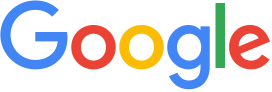

done


In [6]:
for i in range(len(links)):
    file_name = 'img{}.png'.format(i)
    #opener=urllib.request.build_opener()
    #opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
    #urllib.request.install_opener(opener)
    urllib.request.urlretrieve(links[i], file_name)
    display(Image(filename = file_name)) 
    os.remove(file_name)
print('done')

#### When encountering “HTTP Error 403: Forbidden”. It possibly due to the server does not know the request is coming from. Some websites will verify the UserAgent in order to prevent from abnormal visit. So you should provide information of your fake browser visit.